# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#############    for preprocessing  #################
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#############    Models   #################
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
#############    Metrics  #################
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
df=pd.read_csv("E:Data/application_train.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# Data preproscessing

In [3]:
df.shape

(307511, 122)

In [4]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
df.isnull().sum().any()

True

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

# Handling missing values

In [9]:
df = df.fillna(0)
print("Data after handling missing values is " ,df.isnull().sum().any())

Data after handling missing values is  False


# Feature Selection using Correlation

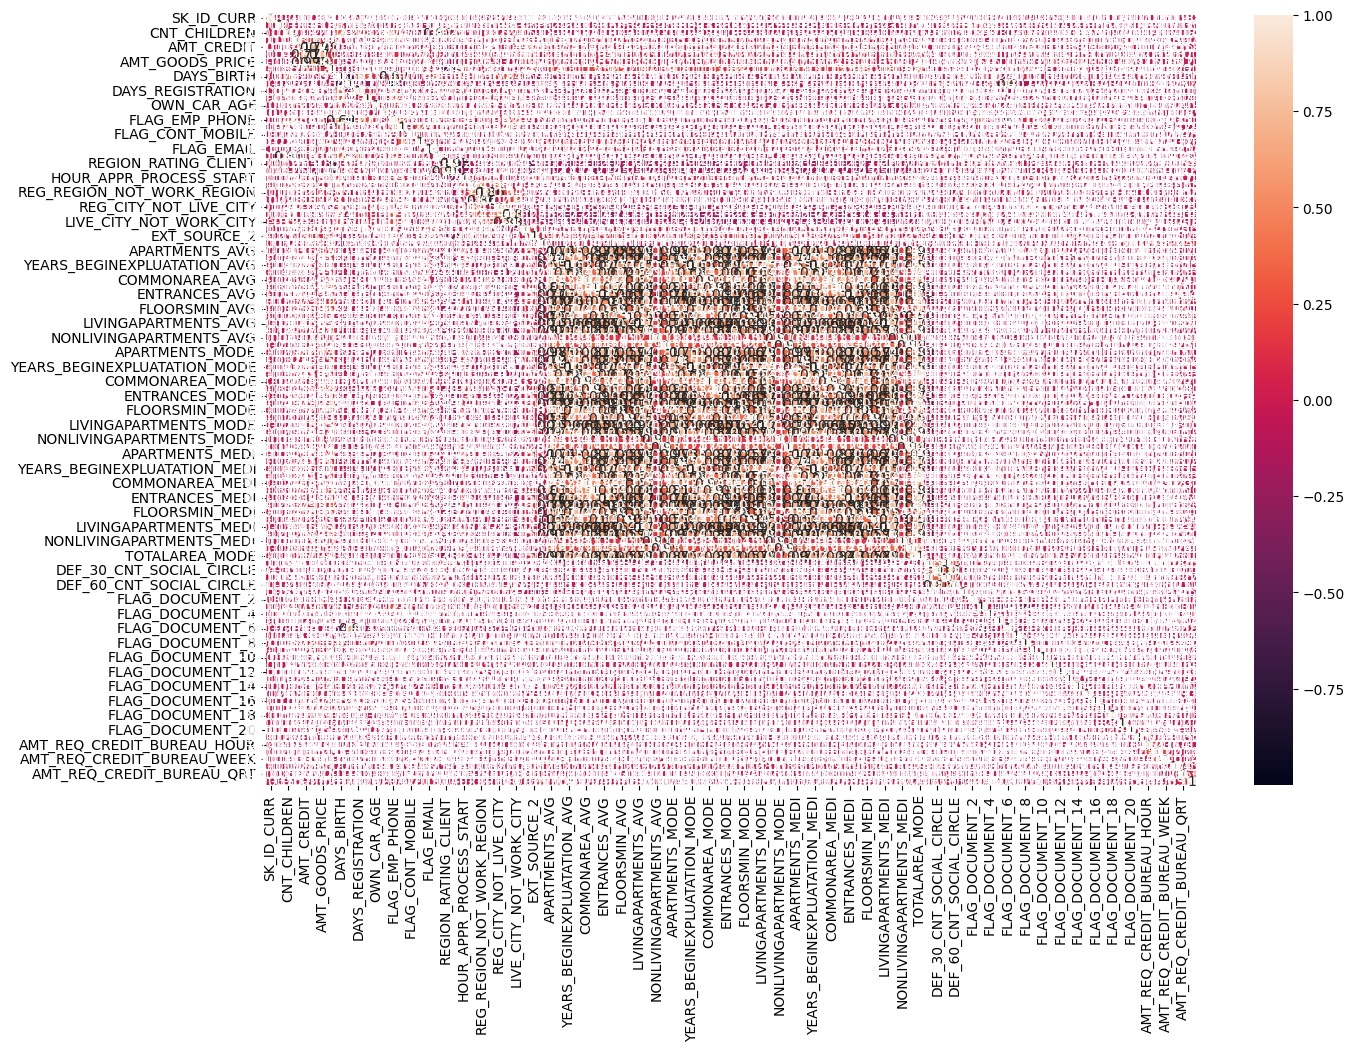

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
# with the following function we can select highly correlated features (positive or negative )
def correlation(dataset, threshold):
    col_corr =set()                                           
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
             if abs (corr_matrix.iloc[i, j]) > threshold:  
                colname = corr_matrix.columns[i]            
                col_corr.add(colname)
    return col_corr 
Correlated_featutres=correlation(df,.75)
Correlated_featutres

{'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'FLAG_EMP_PHONE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT_W_CITY',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE'}

In [12]:
# After selected features
df=df.drop(Correlated_featutres,axis=1)
df.shape

(307511, 78)

# Encoding for Categorical data

In [13]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
df        

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   0            1             0   
1           100003       0                   0            0             0   
2           100004       0                   1            1             1   
3           100006       0                   0            0             0   
4           100007       0                   0            1             0   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   0            1             0   
307507      456252       0                   0            0             0   
307508      456253       0                   0            0             0   
307509      456254       1                   0            0             0   
307510      456255       0                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        NAME_TYPE_SUITE  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                     7  ...                 0                 0   
1                     2  ...                 0                 0   
2                     7  ...                 0                 0   
3                     7  ...                 0                 0   
4                     7  ...                 0                 0   
...                 ...  ...               ...               ...   
307506                7  ...                 0                 0   
307507                7  ...                 0                 0   
307508                7  ...                 0                 0   
307509                7  ...                 0                 0   
307510                7  ...                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      0                 0                         0.0   
1                      0                 0                         0.0   
2                      0                 0                         0.0   
3                      0                 0                         0.0   
4                      0                 0                         0.0   
...                  ...               ...                         ...   
307506                 0                 0                         0.0   
307507                 0                 0                         0.0   
307508                 0                 0                         1.0   
307509                 0                 0                         0.0   
307510                 0                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        0.0                         0.0   
3075

# Declare Target variable 

In [14]:
X = df.drop(columns=["TARGET","SK_ID_CURR"])
y = df['TARGET']


# Remove Features with zero variance 

In [15]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

constant_columns = [column for column in df.columns if column not in df.columns[var_thres.get_support()]]
for feature in constant_columns:
     print(feature)


# Checking if the data is balanced or not 

AxesSubplot(0.22375,0.11;0.5775x0.77)
0    282686
1     24825
Name: TARGET, dtype: int64


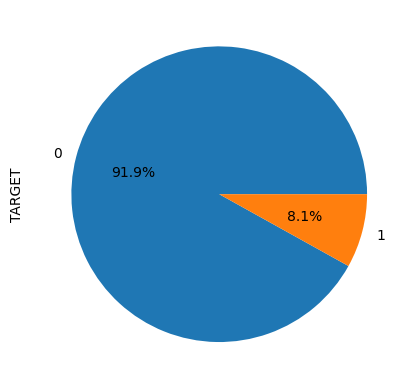

In [16]:
print(y.value_counts().plot.pie(autopct="%1.1f%%"))
print(y.value_counts())


# Making the data balanced using over sampling

In [17]:
from collections import Counter
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Check the number of records after over sampling
print(sorted(Counter(y).items()),y.shape)

[(0, 282686), (1, 282686)] (565372,)


<AxesSubplot: ylabel='TARGET'>

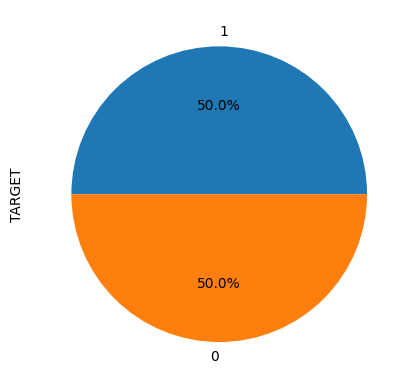

In [18]:
y.value_counts().plot.pie(autopct="%1.1f%%")

# Normalize Features 

In [19]:
from sklearn.preprocessing import StandardScaler
names = X.columns
scaler=StandardScaler(copy=True,with_mean=True,with_std=True)
X = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X, columns=names)

# Splitting Data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df,y,test_size=.25,random_state=44)
x_train.shape

(424029, 76)

In [21]:
x_train.shape
x_test.shape

(141343, 76)

  #                                          <<              Data Modeling          >>

# Support Vector Machine 

Support Vector Machine Model accuracy is :  85.42269514585087
 f1 Accuracy is :  85.42269514585087
 precision Accuracy is :  85.42269514585087
 recall Accuracy is :  85.42269514585087


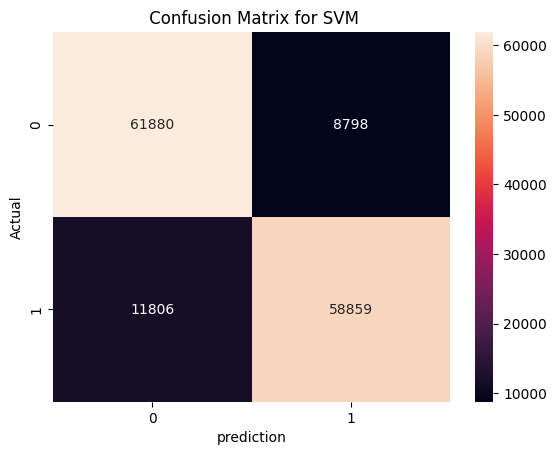

In [22]:
from sklearn.svm import LinearSVC
SVM = LinearSVC().fit(x_train, y_train)
y_pred = SVM.predict(x_test)
SVM_accuracy = accuracy_score(y_pred,y_test)
print('Support Vector Machine Model accuracy is : ', SVM_accuracy*100)
print(" f1 Accuracy is : ", f1_score(y_pred, y_test, average='micro')*100)
print(" precision Accuracy is : ", precision_score(y_pred, y_test, average='micro')*100)
print(" recall Accuracy is : ", recall_score(y_pred, y_test, average='micro')*100)

cf1= confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title(' Confusion Matrix for SVM')
plt.show()

# Logistic Regression model

LogisticRegressionModel accuracy is :  85.50193500916211
 f1 Accuracy is :  85.50193500916211
 precision Accuracy is :  85.50193500916211
 recall Accuracy is :  85.50193500916211


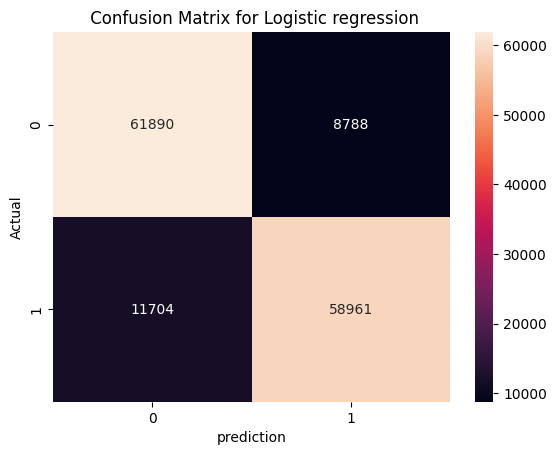

In [23]:
lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_pred,y_test)
print('LogisticRegressionModel accuracy is : ', lr_accuracy*100)
print(" f1 Accuracy is : ", f1_score(y_pred, y_test, average='micro')*100)
print(" precision Accuracy is : ", precision_score(y_pred, y_test, average='micro')*100)
print(" recall Accuracy is : ", recall_score(y_pred, y_test, average='micro')*100)

cf1= confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title(' Confusion Matrix for Logistic regression')
plt.show()

# Decision tree model

DecisionTreeClassifier accuracy is :  88.65950206235894
 f1 Accuracy is :  88.65950206235894
 precision Accuracy is :  88.65950206235894
 recall Accuracy is :  88.65950206235894


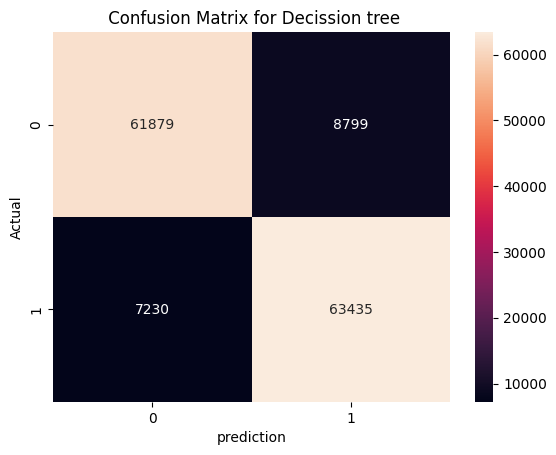

In [24]:
dt= DecisionTreeClassifier().fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_accuracy = accuracy_score(y_pred,y_test)
print('DecisionTreeClassifier accuracy is : ', dt_accuracy*100)
print(" f1 Accuracy is : ", f1_score(y_pred, y_test, average='micro')*100)
print(" precision Accuracy is : ", precision_score(y_pred, y_test, average='micro')*100)
print(" recall Accuracy is : ", recall_score(y_pred, y_test, average='micro')*100)

cf1= confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title(' Confusion Matrix for Decission tree')
plt.show()

# Random Forest model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    1.6s finished


RandomForestClassifier accuracy is :  94.99020114190303
 f1 Accuracy is :  94.99020114190303
 precision Accuracy is :  94.99020114190303
 recall Accuracy is :  94.99020114190303


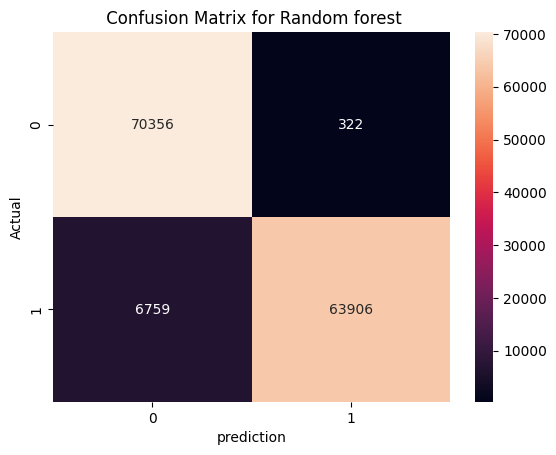

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators = 150, random_state = 0, verbose = 1, n_jobs = -1).fit(x_train, y_train)
y_pred = RF.predict(x_test)
RF_accuracy = accuracy_score(y_pred,y_test)
print('RandomForestClassifier accuracy is : ', RF_accuracy*100)
print(" f1 Accuracy is : ", f1_score(y_pred, y_test, average='micro')*100)
print(" precision Accuracy is : ", precision_score(y_pred, y_test, average='micro')*100)
print(" recall Accuracy is : ", recall_score(y_pred, y_test, average='micro')*100)

cf1= confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title(' Confusion Matrix for Random forest')
plt.show()

# KNN Model 

KNN accuracy is :  89.93936735459131
 f1 Accuracy is :  89.93936735459131
 precision Accuracy is :  89.93936735459131
 recall Accuracy is :  89.93936735459131


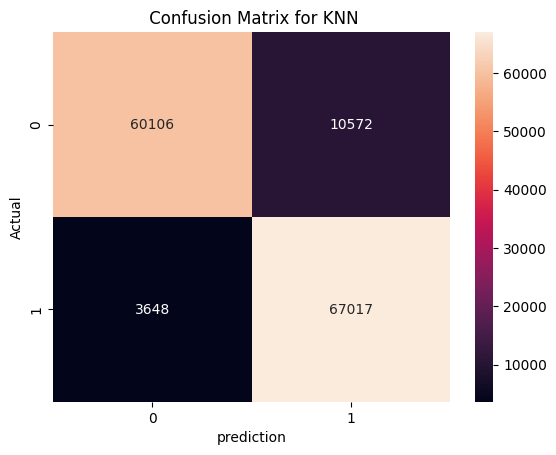

In [26]:
KNN = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)
y_pred = KNN.predict(x_test)
KNN_accuracy = accuracy_score(y_pred,y_test)
print('KNN accuracy is : ', KNN_accuracy*100)
print(" f1 Accuracy is : ", f1_score(y_pred, y_test, average='micro')*100)
print(" precision Accuracy is : ", precision_score(y_pred, y_test, average='micro')*100)
print(" recall Accuracy is : ", recall_score(y_pred, y_test, average='micro')*100)

cf1= confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title(' Confusion Matrix for KNN')
plt.show()

# Naive Bayes Model

NB accuracy is :  54.06988672944539
 f1 Accuracy is :  54.06988672944539
 precision Accuracy is :  54.06988672944539
 recall Accuracy is :  54.06988672944539


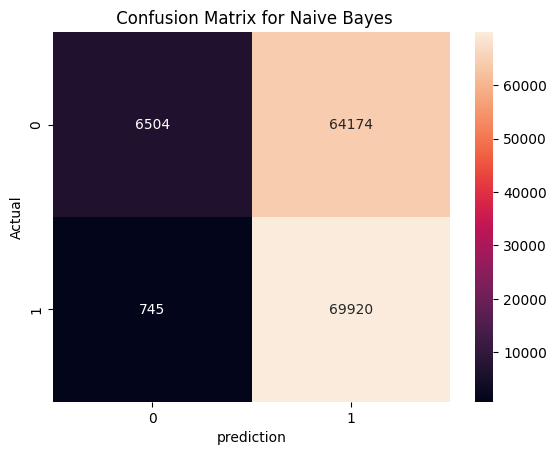

In [27]:
NB= GaussianNB().fit(x_train, y_train)
y_pred = NB.predict(x_test)
NB_accuracy = accuracy_score(y_pred,y_test)
print('NB accuracy is : ', NB_accuracy*100)
print(" f1 Accuracy is : ", f1_score(y_pred, y_test, average='micro')*100)
print(" precision Accuracy is : ", precision_score(y_pred, y_test, average='micro')*100)
print(" recall Accuracy is : ", recall_score(y_pred, y_test, average='micro')*100)

cf1= confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title(' Confusion Matrix for Naive Bayes')
plt.show()

# Output

In [29]:
models = ["LSVM",'LogisticRegression','DecisionTree','RandomForest',"KNN","Naive Bayes"]
model_data = [SVM_accuracy*100,lr_accuracy*100, dt_accuracy*100, RF_accuracy*100,KNN_accuracy*100,NB_accuracy*100]
cols = ["accuracy_score"]
compare=pd.DataFrame(data=model_data , index= models , columns= cols)
compare.sort_values(ascending= False , by = ['accuracy_score'])

accuracy_score
RandomForest             94.990201
KNN                      89.939367
DecisionTree             88.659502
LogisticRegression       85.501935
LSVM                     85.422695
Naive Bayes              54.069887

In [30]:
fig=px.bar(compare, x=models, y="accuracy_score")
fig.update_layout(template="plotly_dark")